I am trying to implement this paper:

***Bird Species Identification Using Spectrogram Based on
Multi-Channel Fusion of DCNNs***

plus, I try to test different time-freq transformations.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Easiest way to download kaggle data in Google Colab
Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

for more infor check this website:
https://www.kaggle.com/discussions/general/74235

In [3]:
!pip3 install kaggle

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 84 kB 527 kB/s eta 0:00:011
     |████████████████████████████████| 163 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 536 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 162 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 4.9 MB/s eta 0:00:011
     |████████████████████████████████| 61 kB 314 kB/s eta 0:00:01
     |████████████████████████████████| 120 kB 795 kB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.6.8-py3-none-any.whl size=111981 sha256=9c4e541985e7755a621fa446a77adf44da67b7f7bcb45626a030209a639ece94
  Stored in directory: /Users/tahouramorovati/Library/Caches/pip/wheels/1e/87/90/a312880e299890ca02a5c3543843ae66f5ec9d427572285049
Successfully built kaggle
You 

In [4]:
!mkdir -p ~/.kaggle
!mv ~/Downloads/kaggle.json ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d tahouramorovati/male-zebra-finch-labeled-audio-file-ipm

 88% 30.0M/34.0M [00:00<00:00, 82.9MB/s]
100% 34.0M/34.0M [00:00<00:00, 81.9MB/s]


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d tahouramorovati/male-zebra-finch-labeled-audio-file-ipm


/Users/tahouramorovati/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
403 - Forbidden


for the next time, we want to implement this:

 Pre-emphasis filter is used to compensate for the
high frequency attenuation of vocalization signal at first. The pre-emphasis coefficient was
set to 0.95. After that, the vocalization signal was segmented into frames and windowed
using the Hamming window function.

## Preemphasis Filter

This is a specific type of pre-processing technique. The pre-emphasis filter is used to boost higher frequencies in the signal relative to lower frequencies. This is done to compensate for the natural attenuation (reduction in intensity) of higher frequencies that often occurs during recording or transmission of audio signals.

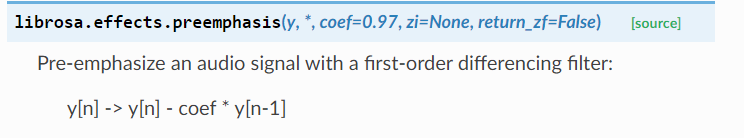

In [8]:
import os
os.getcwd()

'/Users/tahouramorovati/Documents/Arshad'

In [13]:
!pip3 install librosa

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 253 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 302 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 31.4 MB 641 kB/s eta 0:00:012
     |████████████████████████████████| 62 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 390 kB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 26.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 42.6 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 591 kB/s eta 0:00:011
     |████████████████████████████████| 176 kB 43.9 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 30.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m 

In [14]:
import matplotlib.pyplot as plt
import librosa

y, sr = librosa.load("./archive/male_noise_song_call.mp3")
y_filt = librosa.effects.preemphasis(y, coef=0.95)

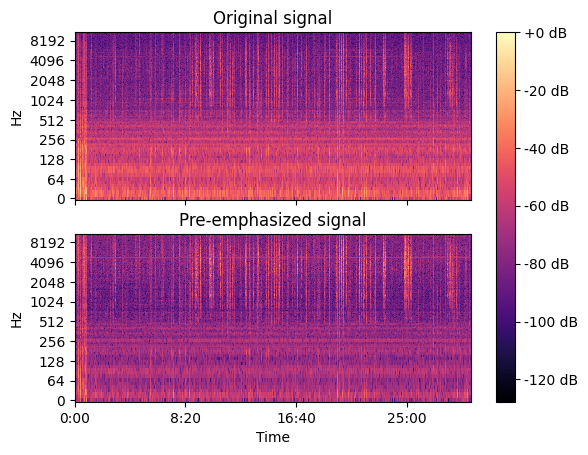

In [15]:
import numpy as np
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Pre-emphasized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")
